In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yearly = pd.read_csv(r'E:\Technolabs mini project 1\datasets\yearly_deaths_by_clinic.csv')

In [3]:
yearly.head(3)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1


In [4]:
yearly1 = yearly.loc[(yearly['clinic']=='clinic 1')]

In [5]:
yearly1

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1


In [6]:
yearly2 = yearly.loc[(yearly['clinic']=='clinic 2')]

In [7]:
yearly2

,year,births,deaths,clinic
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2
11,1846,3754,105,clinic 2


In [8]:
yearly["proportion_deaths"] = yearly.deaths/yearly.births

In [9]:
yearly["proportion_deaths"].head()

0    0.078063
1    0.157591
2    0.089542
3    0.082357
4    0.069015
Name: proportion_deaths, dtype: float64

In [10]:
ax = yearly.plot[x=yearly["clinic 1"],y="proportion_deaths",label="yearly1"]
yearly2.plot[x='clinic 2',y='proportion_deaths',label='yearly2',ax=ax]

SyntaxError: invalid syntax (<ipython-input-10-b7ea6faf5bf3>, line 1)

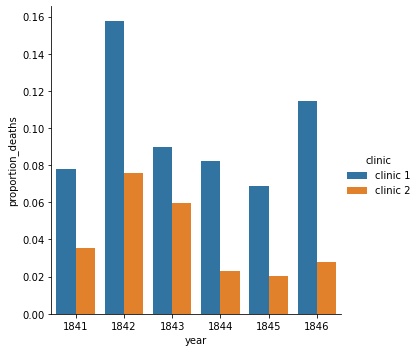

In [11]:
sns.catplot(data=yearly,x="year",y="proportion_deaths",hue = "clinic",kind='bar')

In [12]:
monthly = pd.read_csv(r'E:\Technolabs mini project 1\datasets\monthly_deaths.csv',parse_dates=["date"])

In [13]:
monthly.head(2)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18


In [14]:
monthly["proportion_deaths"] = monthly.deaths/monthly.births

In [15]:
monthly["proportion_deaths"].head()

0    0.145669
1    0.075314
2    0.043321
3    0.015686
4    0.007843
Name: proportion_deaths, dtype: float64

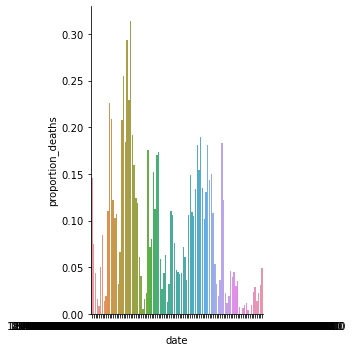

In [16]:
sns.catplot(data=monthly,x = 'date',y='proportion_deaths',kind='bar')

Text(0, 0.5, 'proportion_deaths')

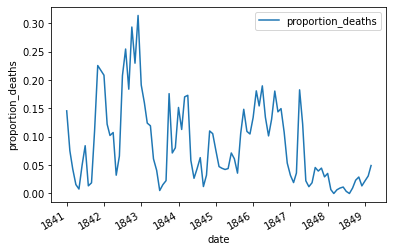

In [17]:
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel('proportion_deaths')

In [26]:
monthly.head()


,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


In [29]:
before_handwash  =  monthly.loc[(monthly['date']<'1847')]

In [30]:
before_handwash

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
66,1846-08-01,216,39,0.180556
67,1846-09-01,271,39,0.143911
68,1846-10-01,254,38,0.149606
69,1846-11-01,297,32,0.107744


In [32]:
after_handwash =  monthly.loc[(monthly['date']>='1847')]

In [38]:
after_handwash.head(2)

,date,births,deaths,proportion_deaths
71,1847-01-01,311,10,0.032154
72,1847-02-01,312,6,0.019231


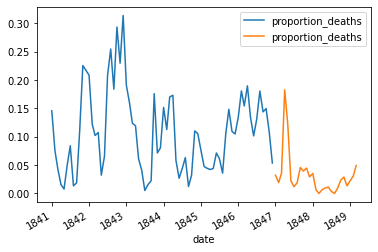

In [37]:
ax = before_handwash.plot(x='date',y='proportion_deaths')
after_handwash.plot(x='date',y='proportion_deaths',ax = ax)

In [41]:
before_prop = before_handwash.proportion_deaths

In [42]:
before_prop.head(2)

0    0.145669
1    0.075314
Name: proportion_deaths, dtype: float64

In [43]:
after_prop = after_handwash.proportion_deaths

In [44]:
after_prop.head(2)

71    0.032154
72    0.019231
Name: proportion_deaths, dtype: float64

In [47]:
monthly_prop = after_prop.mean() - before_prop.mean()

In [48]:
monthly_prop

-0.07519076642777145

In [51]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_prop.sample(frac=1,replace =True)
    boot_after = after_prop.sample(frac=1,replace =True)
    boot_mean_diff.append(boot_after.mean() -  boot_before.mean())

In [58]:
pd.Series(boot_mean_diff).quantile([0.025 ,0.975])


0.025   -0.096315
0.975   -0.053103
dtype: float64

In [59]:
#doctors_should_wash_their_hands = True